In [1]:
from epi_model import *

In [2]:
from simulation_helper import *

In [3]:
from simulation_manager import simulation_manager

In [4]:
from frozendict import frozendict as fzd

In [23]:
dfs, modelsets = {},{}

In [24]:
names = [
    'HS1-more_err',
    'HS2-more_err',
    'synthetic_3-more_err'
]

In [25]:
for name in names:
    
    print(f'loading {name}')

    sim_m = simulation_manager()
    sim_m.load_models(name)

    rows = []
    for k,ms in sim_m.models.items():
        rows.append(sim_m.info(k))

    df = pd.DataFrame.from_records(rows)

    #df.head()
    
    dfs[name] = df
    modelsets[name] = sim_m

loading HS1-more_err
loading HS2-more_err
loading synthetic_3-more_err


In [26]:
defaults = {
    'R0_mean': 2.5,
    'VACCINATE_P': 0.20,
    'INITIAL_INFECT': 20,
    'R0_coeffvar': 0.2
}

In [27]:
strats = [
    'friendHighDegNormalErr10',
    'friendHighDegNormalErr20',
    'friendHighDegNormalErr30',
    'friendHighDegNormalErr40',
    'friendHighDegNormalErr50',
    'friendHighDegRandTop3',
    'friendHighDegRandTop5',
    'friendHighDegRandTop10',
    'friendHighDegRandTop20',
    'friendHighDegRandTop35',
    'friendHighDegRandTop50',
    'friend'
]

In [28]:
plt.style.use('seaborn-whitegrid')

In [29]:
names = [
    'HS1-more_err',
    'HS2-more_err',
    'synthetic_3-more_err'
]

In [30]:
titles = {
    'HS1-more_err': "HS-1",
    'HS2-more_err': "HS-2",
    'synthetic_3-more_err': "Synthetic",
}

In [31]:
strat_print = {
    'friendHighDegNormalErr10': "NP(ε=10)",
    'friendHighDegNormalErr20': "NP(ε=20)",
    'friendHighDegNormalErr30': "NP(ε=30)",
    'friendHighDegNormalErr40': "NP(ε=40)",
    'friendHighDegNormalErr50': "NP(ε=50)",
    'friendHighDegRandTop3': "NP(N=3)",
    'friendHighDegRandTop5': "NP(N=5)",
    'friendHighDegRandTop10': "NP(N=10)",
    'friendHighDegRandTop20': "NP(N=20)",
    'friendHighDegRandTop35': "NP(N=35)",
    'friendHighDegRandTop50': "NP(N=50)",
    'friend': 'NR'
}

In [32]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

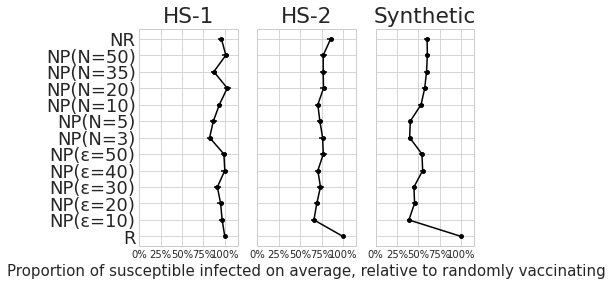

In [33]:
for ni, name in enumerate(names):
    #plt.figure(figsize=(5,15 * len(comparisons[comp])/4))
    plt.subplot(1,3,ni+1)

    allvs = []
    allys = []

    sim_m = modelsets[name]
    df = dfs[name]

    svals = []
    for s in strats:
        d = dict(defaults)
        d['strat'] = s

        inf = sim_m.info( fzd( d ) )
        #print(inf['mean'], [x['mean'] for x in svals])

        svals.append(inf)


    #[s['N']s['mean'] for s in svals]

    xs = np.array([1]+[ s['P_sus_inf_rel_rand'] for s in svals ])
    ys = np.linspace(0,0.8,len(svals)+1)

    #plt.scatter(xs,ys)

    xerrs = np.array([0]+[s['P_sus_inf_rel_rand_err'] for s in svals ],)

    plt.errorbar(
        xs, ys,
        xerr = xerrs,
        color='black'
    )
    plt.scatter(xs, ys, s=15, color='black')
    #print([s['min'] for s in svals])

    allvs.append( np.min(xs-xerrs)-0.05 )
    allvs.append( np.max(xs+xerrs)+0.05 )

    allys += list(ys)

    plt.title(f'{titles[name]}')

    ytk = np.linspace(0,1.0,5)
    plt.xticks(ytk, [f'{t:0.0%}' for t in ytk], fontsize=10)

    if ni==1:
        plt.xlabel('Proportion of susceptible infected on average, relative to randomly vaccinating', fontsize=15)

    plt.xlim( min(allvs),max(allvs) )

    if ni==0:
        plt.yticks(
            allys,
            (["R"]+[strat_print[s] for s in strats])
        )
    else:
        plt.yticks(
            allys,
            []
        )

    #plt.vlines([0.5, 0.75, 1], *plt.ylim())
    plt.grid('y')
    plt.xlim(0,1.15)

plt.savefig(f'figures/{name}.more_err.png', dpi=300)
plt.show()